# 第 3 章 k 近邻法
## 3.2 k 近邻模型
### 例 3.1
已知二维空间的3个点 $x_1=(1, 1)^T, x_2=(5, 1)^T, x_3=(4,4)^T$,试求在$p$取不同值试，$L_p$距离下$x_1$的最近邻点。

In [78]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
def Lp_distance(p, xi, xj):
    xi, xj = np.array(xi), np.array(xj)
    distance = 0.0
    for item in np.abs(xi - xj):
        distance = distance + item ** p
    return distance ** (1/p)

In [81]:
x1 = (1, 1)
x2 = (5, 1)
x3 = (4, 4)

In [82]:
Lp_distance(1, x1, x2), Lp_distance(2, x1, x2), Lp_distance(3, x1, x2), Lp_distance(4, x1, x2)

(4.0, 4.0, 3.9999999999999996, 4.0)

In [83]:
Lp_distance(1, x1, x3), Lp_distance(2, x1, x3), Lp_distance(3, x1, x3), Lp_distance(4, x1, x3)

(6.0, 4.242640687119285, 3.7797631496846193, 3.5676213450081633)

## 3.3 k 近邻法的实现： kd 树
### 例 3.2
给定一个二维空间的数据集：$T=\{(2, 3)^T, (5, 4)^T, (9, 6)^T, (4, 7)^T, (8, 1)^T, (7, 2)^T\}$,构造一个平衡kd树

运行代码如下， 结果如图所示：

![](http://qiniu.lianghao.work/markdown/20220415111803.png)

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph
from operator import itemgetter
%matplotlib inline

In [3]:
# 数据
train_data = [(2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2)]

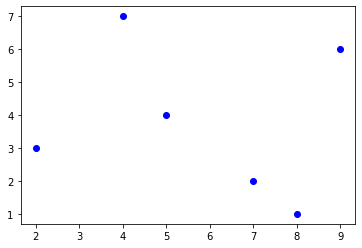

In [72]:
# 打印数据
plt.plot([item[0] for item in train_data], [item[1] for item in train_data], 'bo')
plt.show()

In [67]:
def MakeItem(Train_Data, dim):
    """
    按照第dim维进行排序，并划分为3部分 left , mid, right
    :param Train_Data: 输入数据
    :param dim: 特征向量的维数
    :return: [left], [mid], [right]
    """
    data = {}
    values = [Train_Data[i][dim] for i in range(0, len(Train_Data))]
    for i in range(0, len(values)):
        if str(i) not in data.keys():
            data[str(i)] = values[i]
    orderData = sorted(data.items(), key=lambda v : v[1])
    n = len(Train_Data)
    mid = n // 2
    left = [Train_Data[int(orderData[i][0])] for i in range(0, mid)]
    mids = [Train_Data[int(orderData[i][0])] for i in range(mid, mid + 1)]
    right = [Train_Data[int(orderData[i][0])] for i in range(mid + 1, n)]
    return left, mids, right

class BinaryTree:
    """
    二叉树的数据结构
    """
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

    def SetNodeVal(self, val):
        self.value = val

def MakeKd(TrainData, j, k):
    """
    根据输入数据，递归构造二叉 kd 树
    :param TrainData: 输入数据
    :param j: kd 树的深度，从0开始
    :param k: 特征向量的总维数
    :return: kd树
    """
    if len(TrainData) >= 1:
        left, mid, right = MakeItem(TrainData, j % k )
        node = BinaryTree(mid[0])
        if len(left) >= 1:
            node.left = MakeKd(left, j + 1, k)
        if len(right) >= 1:
            node.right = MakeKd(right, j + 1, k)
    return node

In [71]:
def MakeKdGraph(tree, g):
    """
    递归实现绘制二叉kd树
    :param tree: kd 树
    :param g: graph 对象
    :return:
    """
    if tree :
        if str(tree.value) not in g:
            # 检测该结点是否已经被创建
            g.node(name=str(tree.value))
        if tree.left:
            g.node(name=str(tree.left.value))
            g.edge(str(tree.value), str(tree.left.value))
        if tree.right:
            g.node(name=str(tree.right.value))
            g.edge(str(tree.value), str(tree.right.value))
        MakeKdGraph(tree.left, g)
        MakeKdGraph(tree.right, g)

In [70]:
# 创建对象
g = Digraph('kdtree')
# 生成kd树
root = MakeKd(train_data, 0, 2)
# 绘制kd树
MakeKdGraph(root, g)
g.view()

'kdtree.gv.pdf'

![](http://qiniu.lianghao.work/markdown/20220415111803.png)

### 例 3.3
给定一个如下所示的kd树，根结点为A，其子结点为B, C等。树上共存储7个实例点；另有一个输入目标实例点S={(7, 2)}，找到S的最近邻点。
数据集：$T=\{(2, 3)^T, (5, 4)^T, (9, 6)^T, (4, 7)^T, (8, 1)^T, (7, 2)^T\}$

![](http://qiniu.lianghao.work/markdown/20220415111803.png)
![](http://qiniu.lianghao.work/markdown/20220415125619.png)



In [74]:
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph
from operator import itemgetter
%matplotlib inline

In [190]:
def MakeItem(Train_Data, dim):
    """
    按照第dim维进行排序，并划分为3部分 left , mid, right
    :param Train_Data: 输入数据
    :param dim: 特征向量的维数
    :return: [left], [mid], [right]
    """
    data = {}
    values = [Train_Data[i][dim] for i in range(0, len(Train_Data))]
    for i in range(0, len(values)):
        if str(i) not in data.keys():
            data[str(i)] = values[i]
    orderData = sorted(data.items(), key=lambda v : v[1])
    n = len(Train_Data)
    mid = n // 2
    left = [Train_Data[int(orderData[i][0])] for i in range(0, mid)]
    mids = [Train_Data[int(orderData[i][0])] for i in range(mid, mid + 1)]
    right = [Train_Data[int(orderData[i][0])] for i in range(mid + 1, n)]
    return left, mids, right

class BinaryTreeP:
    """
    二叉树的数据结构
    """
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None
        self.dim = None

    def SetNodeVal(self, val):
        self.value = val

def MakeKdP(TrainData, j, k):
    """
    根据输入数据，递归构造二叉 kd 树。
    Modify: 加了parent指针
    :param TrainData: 输入数据
    :param j: kd 树的深度，从0开始
    :param k: 特征向量的总维数
    :return: kd树
    """
    if len(TrainData) >= 1:
        left, mid, right = MakeItem(TrainData, j % k )
        node = BinaryTreeP(mid[0])
        node.dim = j % k
        if len(left) >= 1:
            node.left = MakeKdP(left, j + 1, k)
            node.left.parent = node
            node.left.dim = (j + 1 ) % k
        if len(right) >= 1:
            node.right = MakeKdP(right, j + 1, k)
            node.right.dim = (j + 1) % k
            node.right.parent = node
    return node

In [191]:
# 数据
train_data = [(2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2)]
root = MakeKdP(train_data, 0, 2)

In [227]:
# step.1 找出包含目标点x的叶节点
def LayerNode(root, x ):
    if root.left != None or root.right != None:
        if x[root.dim] < root.value[root.dim]:
            if root.left:
                node = LayerNode(root.left, x)
        else:
            if root.right:
                node = LayerNode(root.right, x)
    else:
        return root
    return node

# step 2 递归地后退
def Back(node, x, leastnodes, p, visted):
    if node.parent :
        # a. 检查当前结点结点
        parent = node.parent
        if Lp_distance(p, node.value, x) < leastnodes[1]:
            leastnodes = [node.value, Lp_distance(p, node.value, x)]
        visted[str(node.value)] = True
        # b. 兄弟结点
        brother = parent.left
        if brother == node:
            brother = parent.right
        if visted[str(brother.value)] == False:
            # 如果兄弟结点没有被递归，且父结点[dim] - target[dim] < 当前最近距离
            # 说明，父结点中存在有最小近邻点的子实例结点
            if parent.value[parent.dim] - x[parent.dim] < leastnodes[1]:
                visted[str(brother.value)] = True
                layer = LayerNode(brother, x)
                leastnodes = Back(layer, x, leastnodes, p, visted)
        leastnodes = Back(parent, x, leastnodes, p, visted)
    return leastnodes


root = MakeKdP(train_data, 0, 2)
s = (4, 3)
layer = LayerNode(root, s)
least = [layer.value, Lp_distance(2, layer.value, s)]
vists = {}
for item in train_data:
    if item not in vists.keys():
        vists[str(item)] = False

A = Back(layer, s, least, 2, vists)
print(A)

[(5, 4), 1.4142135623730951]


In [205]:
root = MakeKdP(train_data, 0, 2)
s = (3, 4.5)

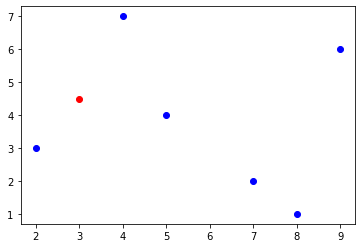

In [181]:
train = [(2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2)]
plt.plot([3], [4.5], 'ro')
plt.plot([item[0] for item in train], [item[1] for item in train], 'bo')
plt.show()

## 习题
### 3.1 参照图3.1，在二维空间中给出实例点，画出k为1和2时的k近邻法构成的空间划分，并对其进行比较，体会k值选择与模型复杂度与预测准确率之间的关系

![](http://qiniu.lianghao.work/markdown/20220415144228.png)

从结果来看，k越小，表示的模型越复杂，对于边界的划分条件比较严格。k越大，边界划分越简单
![](http://qiniu.lianghao.work/markdown/20220415161439.png)

In [228]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

'''Ref: https://blog.csdn.net/sdu_hao/article/details/103055338'''

In [233]:
Train = np.array([[5, 12, 1], [6, 21, 0], [14, 5, 0],
                 [16, 10, 0], [13, 19, 0], [13, 32, 1],
                 [17, 27, 1], [18, 24, 1], [20, 20, 0],
                 [23, 14, 1], [23, 25, 1], [23, 31, 1],
                 [26, 8, 0], [30, 17, 1], [30, 26, 1],
                 [34, 8, 0], [34, 19, 1], [37, 28, 1]])
train_input = Train[:, 0 : 2]
train_output = Train[:, -1]

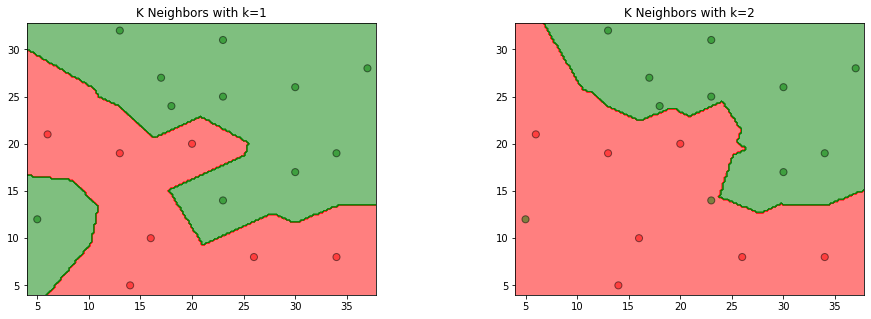

In [242]:
# 创建KNN分类模型
models = (
    KNeighborsClassifier(n_neighbors=1, n_jobs=1),
    KNeighborsClassifier(n_neighbors=2, n_jobs=1)
)
# 训练数据
modelfit = (model.fit(train_input, train_output) for model in models)
# 标题
titles = (
    'K Neighbors with k=1',
    'K Neighbors with k=2'
)
# 画布
fig = plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.1)
# 生成网格点
x_min, x_max = train_input[:, 0].min(), train_input[:, 0].max()
y_min, y_max = train_input[:, 1].min(), train_input[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min - 1, x_max + 1, 0.2), np.arange(y_min - 1, y_max + 1, 0.2))
# 绘制图像
for model, title, ax in zip(modelfit, titles, fig.subplots(1, 2).flatten()):
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    colors = ['red', 'green', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(z))])
    # 预测的
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)
    # 训练的
    ax.scatter(train_input[:, 0], train_input[:, 1], c= train_output , s=50, edgecolors='k', cmap=cmap, alpha=0.5)
    ax.set_title(title)
plt.show()

### 3.2 利用例题3.2 构造的kd树求点 $x = (3, 4.5)^T$的最近邻点
![](http://qiniu.lianghao.work/markdown/20220415111803.png)

#### (1)自己写的方法

In [ ]:
def MakeItem(Train_Data, dim):
    """
    按照第dim维进行排序，并划分为3部分 left , mid, right
    :param Train_Data: 输入数据
    :param dim: 特征向量的维数
    :return: [left], [mid], [right]
    """
    data = {}
    values = [Train_Data[i][dim] for i in range(0, len(Train_Data))]
    for i in range(0, len(values)):
        if str(i) not in data.keys():
            data[str(i)] = values[i]
    orderData = sorted(data.items(), key=lambda v : v[1])
    n = len(Train_Data)
    mid = n // 2
    left = [Train_Data[int(orderData[i][0])] for i in range(0, mid)]
    mids = [Train_Data[int(orderData[i][0])] for i in range(mid, mid + 1)]
    right = [Train_Data[int(orderData[i][0])] for i in range(mid + 1, n)]
    return left, mids, right

class BinaryTreeP:
    """
    二叉树的数据结构
    """
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None
        self.dim = None

    def SetNodeVal(self, val):
        self.value = val

def MakeKdP(TrainData, j, k):
    """
    根据输入数据，递归构造二叉 kd 树。
    Modify: 加了parent指针
    :param TrainData: 输入数据
    :param j: kd 树的深度，从0开始
    :param k: 特征向量的总维数
    :return: kd树
    """
    if len(TrainData) >= 1:
        left, mid, right = MakeItem(TrainData, j % k )
        node = BinaryTreeP(mid[0])
        node.dim = j % k
        if len(left) >= 1:
            node.left = MakeKdP(left, j + 1, k)
            node.left.parent = node
            node.left.dim = (j + 1 ) % k
        if len(right) >= 1:
            node.right = MakeKdP(right, j + 1, k)
            node.right.dim = (j + 1) % k
            node.right.parent = node
    return node
# step.1 找出包含目标点x的叶节点
def LayerNode(root, x ):
    if root.left != None or root.right != None:
        if x[root.dim] < root.value[root.dim]:
            if root.left:
                node = LayerNode(root.left, x)
        else:
            if root.right:
                node = LayerNode(root.right, x)
    else:
        return root
    return node

# step 2 递归地后退
def Back(node, x, leastnodes, p, visted):
    if node.parent :
        # a. 检查当前结点结点
        parent = node.parent
        if Lp_distance(p, node.value, x) < leastnodes[1]:
            leastnodes = [node.value, Lp_distance(p, node.value, x)]
        visted[str(node.value)] = True
        # b. 兄弟结点
        brother = parent.left
        if brother == node:
            brother = parent.right
        if visted[str(brother.value)] == False:
            # 如果兄弟结点没有被递归，且父结点[dim] - target[dim] < 当前最近距离
            # 说明，父结点中存在有最小近邻点的子实例结点
            if parent.value[parent.dim] - x[parent.dim] < leastnodes[1]:
                visted[str(brother.value)] = True
                layer = LayerNode(brother, x)
                leastnodes = Back(layer, x, leastnodes, p, visted)
        leastnodes = Back(parent, x, leastnodes, p, visted)
    return leastnodes


In [245]:
# 数据
train_data = [(2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2)]
# KD树
root = MakeKdP(train_data, 0, 2)
# 目标点
s = (3, 4.5)
layer = LayerNode(root, s)
least = [layer.value, Lp_distance(2, layer.value, s)]
vists = {}
for item in train_data:
    if item not in vists.keys():
        vists[str(item)] = False

A = Back(layer, s, least, 2, vists)
print(A)

[(2, 3), 1.8027756377319946]


#### (2) 借助sklearn

In [262]:
import numpy as np
from sklearn.neighbors import KDTree

train_data = [(2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2)]
# 构造平衡Kd树
kdtree = KDTree(np.array(train_data), leaf_size=2)
# 查询（3, 4.5) 的最近邻点
# dist: 最近邻点与目标点的距离
# ind: 最近邻点在输入数据中的序号
dist, ind = kdtree.query(np.array([[3, 4.5]]), k=1)
print("(2， 3) 的 最近邻点 ： ", train_data[ind.squeeze()])

(2， 3) 的 最近邻点 ：  (2, 3)


### 3.3 参照算法3.3，写出输出为x的k近邻的算法
**输入**：已构造的kd树，目标点$x$，$k$值
**输出**：x的k近邻点集S

（1）在kd树找出包含目标点x的叶结点：从根节点出发，递归地向下访问kd树，若目标点x当前维（与kd树的深度有关l = j % k + 1）的坐标小于当前所在的切分点的坐标，则移动到左子结点，否则，移动到右子结点。**直到当前的结点为叶结点为止**。
（2）以此叶节点为“当前最近点”，并插入近邻点集S中。
（3）递归地向上后退：
- (a)如果当前的“近邻点集S”的元素个数小于k,将结点A插入到近邻点集S。如果当前结点到目标点x的距离小于近邻点集S中某个点B到目标点的距离，就将当前点A插入，结点B丢弃。
- (b)检查当前结点A的兄弟结点C是否与以目标点x为球心、以目标点x到当前近邻点集S中的最远距离为半径的超球体相交。(判读相交：C[C.dim] - X[C.dim] < distance(x到S中点的最大距离))。如果相交，就使用（1）的方法来搜索以兄弟节点C为根节点的子KD树。如果不相交，退回到当前结点A的父母结点P。、

（4）一直重复下去，直到当前结点为KD树的根结点。此时的近邻点集S为目标X的k近邻点集